<div align="center">

# Play Ground Series S3 E24

## 💎 Predicting the Hardness of minerals from data 💎

### Welcome to my kaggle notebook! Although I'm not a professional data scientist, I'm deeply interested in data analysis as a hobby. This project is an exciting exploration into using data to predict the hardness of minerals.

</div>


In [2]:

# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# ML imports
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor



## Description of data points
---

* id: A unique identifier for each record in the dataset.
* allelectrons_Total: The total number of electrons in the materials.
* density_Total: The total density of the materials.
* allelectrons_Average: The average number of electrons in the materials.
* val_e_Average: The average number of valence electrons.
* atomicweight_Average: The average atomic weight of the elements in the materials.
* ionenergy_Average: The average ionization energy.
* el_neg_chi_Average: The average electronegativity.
* R_vdw_element_Average: The average van der Waals radius of the elements.
* R_cov_element_Average: The average covalent radius of the elements.
* zaratio_Average: The average ratio of protons to electrons.
* density_Average: The average density of the materials.
* Hardness: The hardness of the materials on the Mohs scale.

In [4]:
df_train = pd.read_csv(r"..\data\train.csv")
df_test = pd.read_csv(r"..\data\test.csv")

## Initial data exploration
---

In [4]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("______________________")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("DataFrame Head:")
    print("______________________")
    display(df.head())
    print("\n")

    print("DataFrame Tail:")
    print("______________________")
    display(df.tail())
    print("\n")

    print("DataFrame Description:")
    print("______________________")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("______________________")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("______________________")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("______________________")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("______________________")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df_train)

DataFrame Information:
______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


None



DataFrame Head:
______________________


,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0




DataFrame Tail:
______________________


,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0
10406,10406,288.0,24.655328,11.142857,4.571429,22.536126,10.960357,2.792143,1.772857,0.940000,0.493919,0.97737,6.5




DataFrame Description:
______________________


,count,mean,std,min,25%,50%,75%,max
id,10407.0,5203.000000,3004.386460,0.0,2601.500000,5203.000000,7804.500000,10406.000000
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840




Number of Null Values:
______________________


id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64



Number of Duplicated Rows:
______________________


0



Number of Unique Values:
______________________


id                       10407
allelectrons_Total         325
density_Total             1099
allelectrons_Average       629
val_e_Average              205
atomicweight_Average       849
ionenergy_Average          898
el_neg_chi_Average         745
R_vdw_element_Average      737
R_cov_element_Average      698
zaratio_Average            815
density_Average            599
Hardness                    50
dtype: int64



DataFrame Shape:
______________________
Rows: 10407, Columns: 13


# EDA
---

In [ ]:
#TODO: Add a function to check for outliers


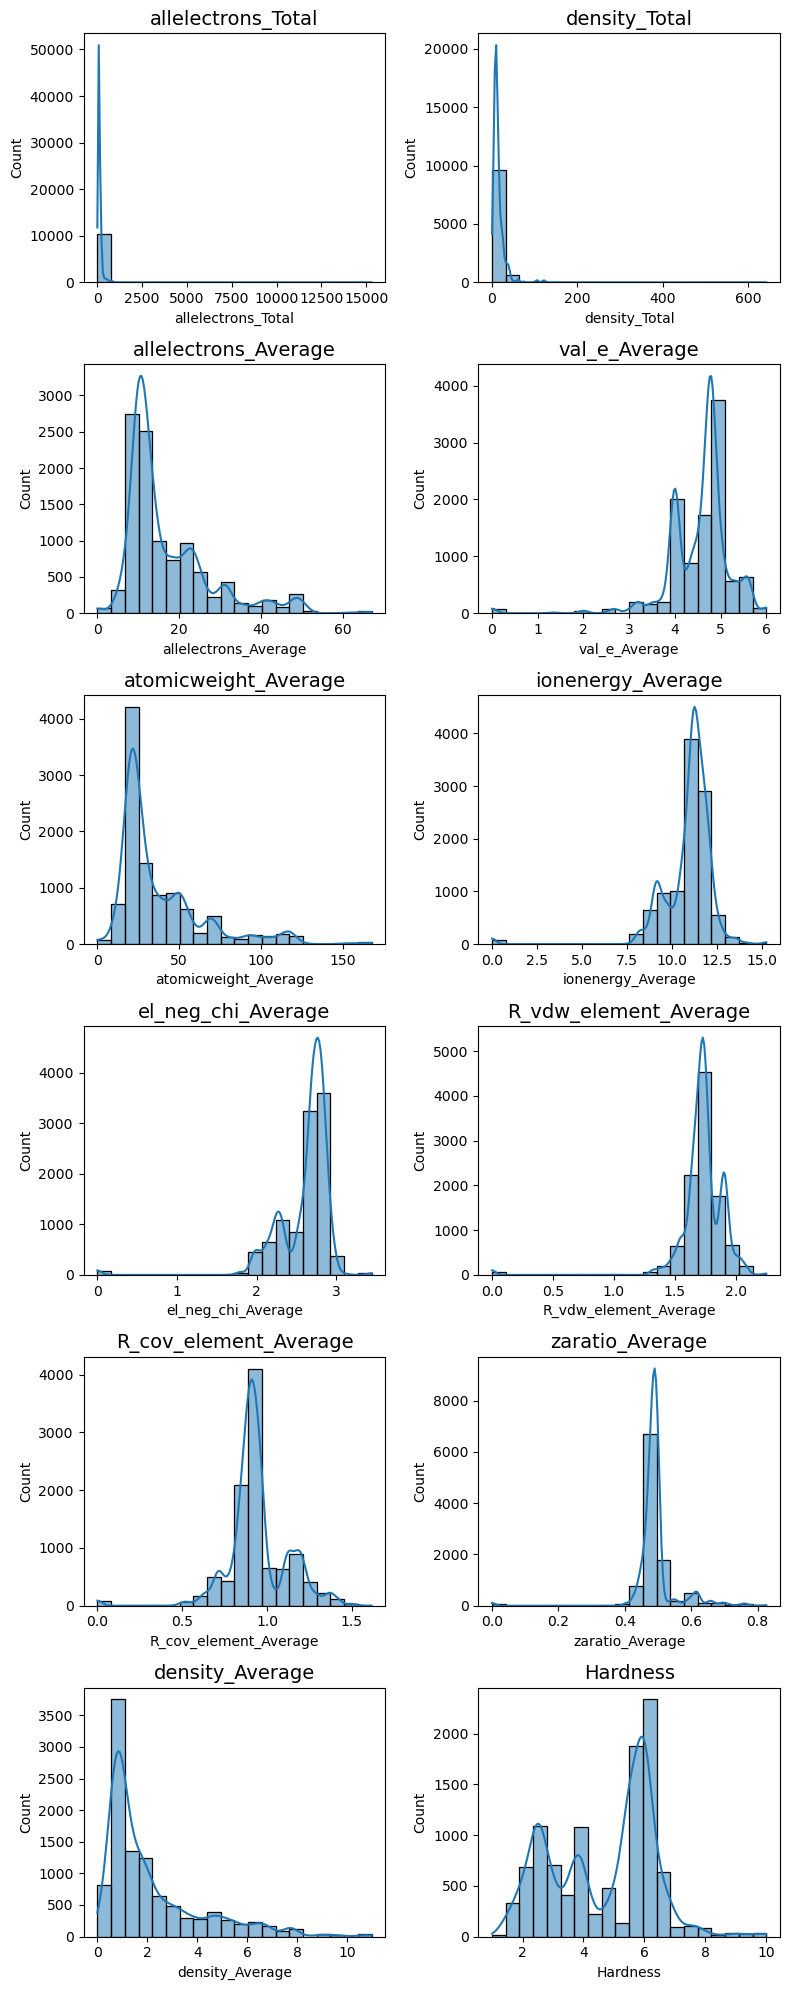

In [49]:
def prelim_eda_histplot(df):
    """
    Create a histogram plot of each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    columns_to_plot = df.drop(['id'], axis=1)

    num_columns = len(columns_to_plot.columns)
    num_rows = (num_columns + 1) // 2  # Adjust the number of rows as needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8,20))

    # Loop over selected columns and create box plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // 2
        col = i % 2
        sns.histplot(data=df, x=column, ax=axes[row, col], kde=True, bins=20)
        axes[row, col].set_title(f'{column}', fontsize=14)
        axes[row,col].set_aspect('auto')

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * 2):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()
prelim_eda_histplot(df_train)

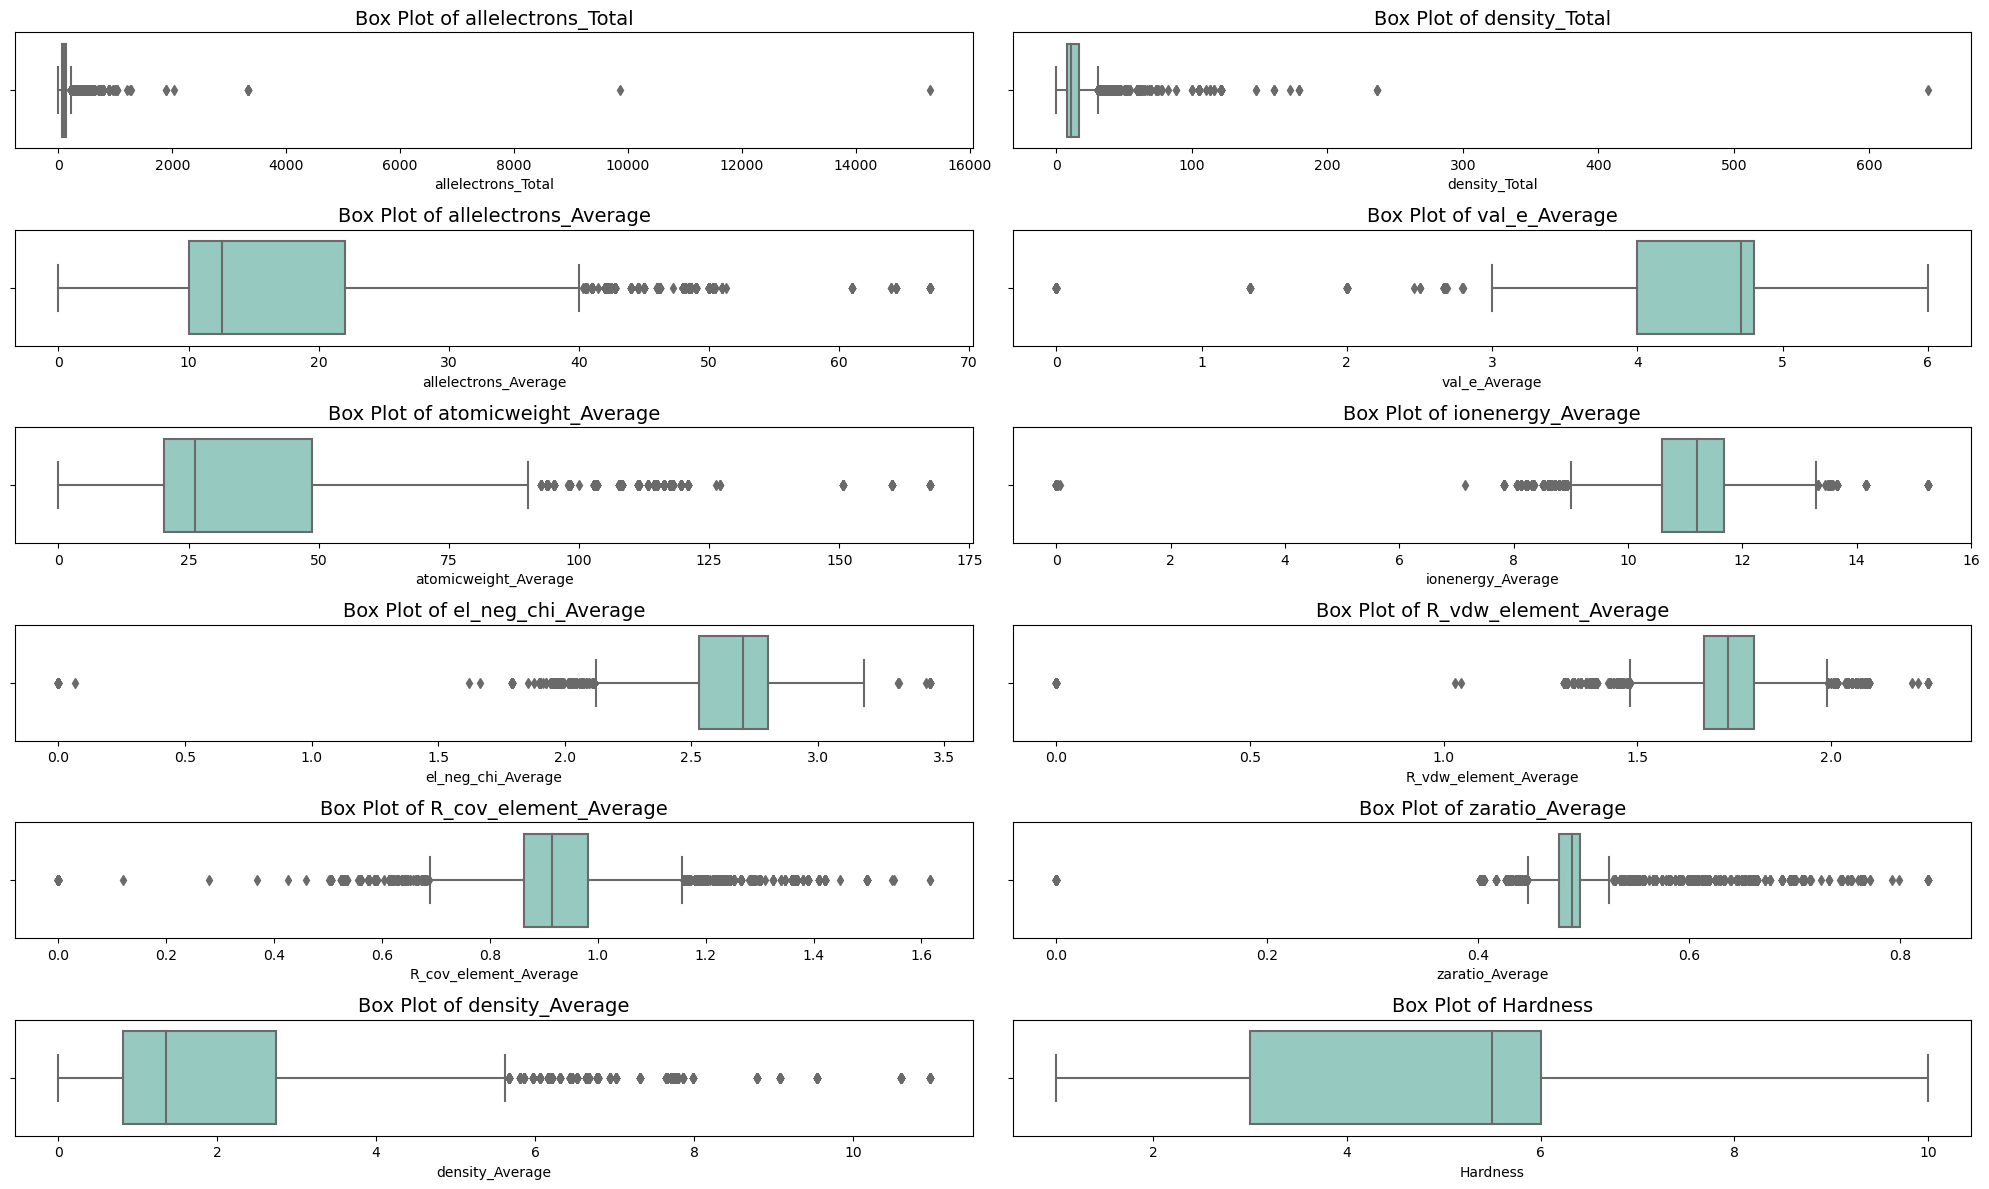

In [52]:
def prelim_eda_boxplot(df):
    """
    Create a boxplot of each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    columns_to_plot = df.drop(['id'], axis=1)

    num_columns = len(columns_to_plot.columns)
    num_rows = (num_columns + 1) // 2  # Adjust the number of rows as needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 12))

    # Loop over selected columns and create box plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df[column], ax=axes[row, col], palette="Set3")
        axes[row, col].set_title(f'Box Plot of {column}', fontsize=14)

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * 2):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()
prelim_eda_boxplot(df_train)

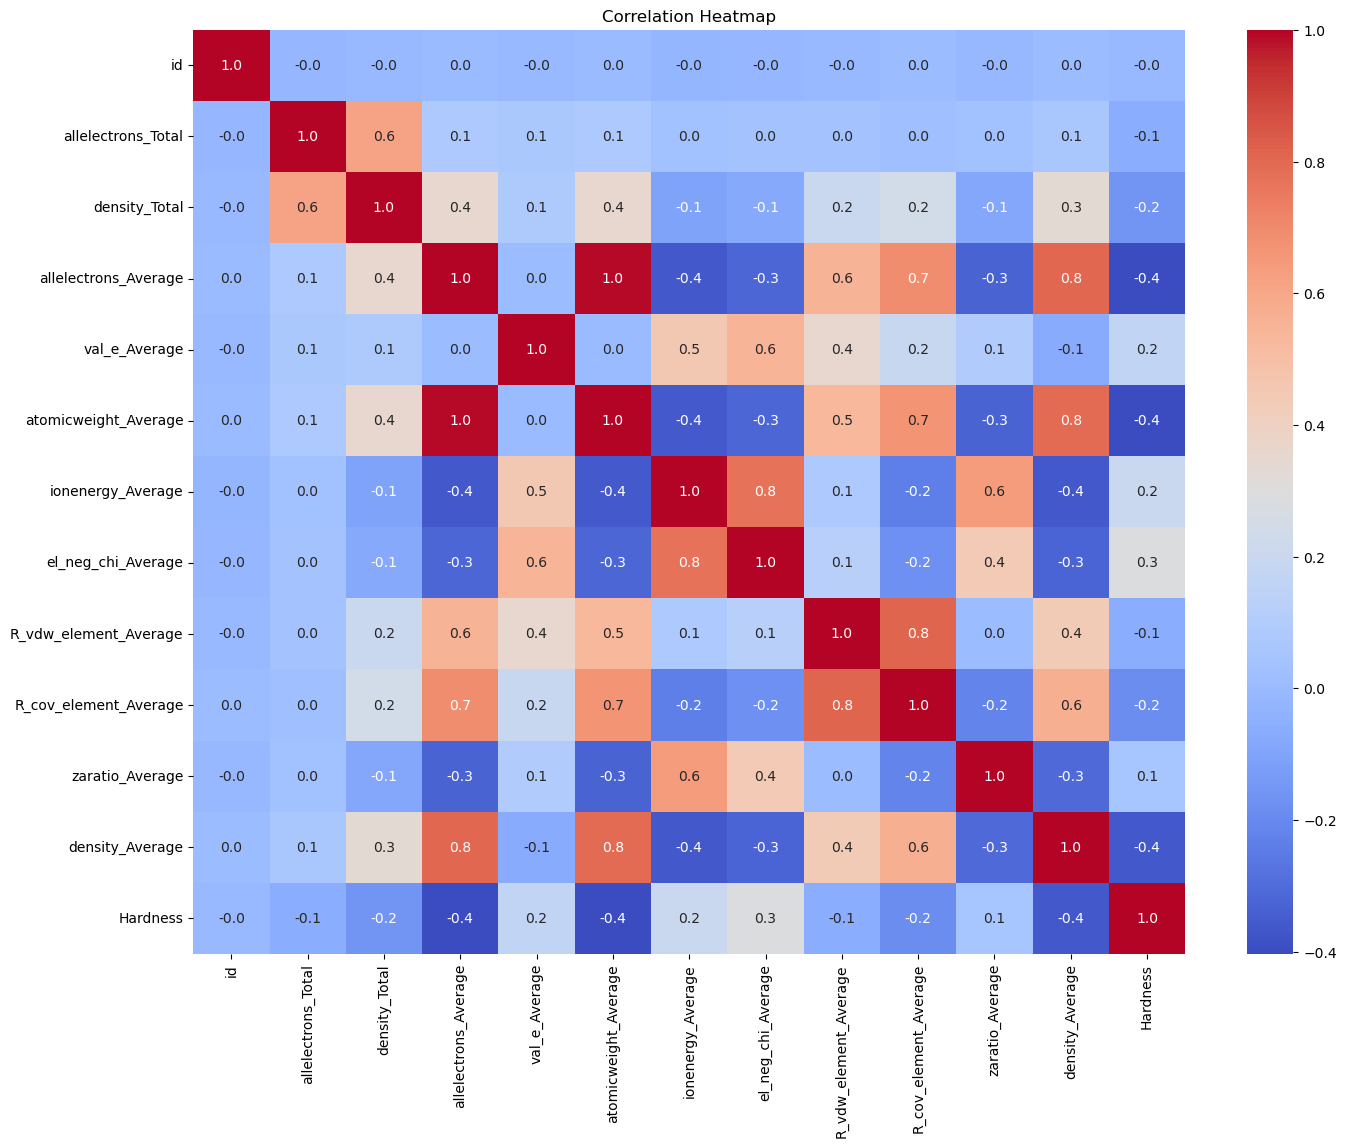

In [51]:
def prelim_eda_heatmap(df):
    """
    Create a heatmap of the correlation between each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    corr = df.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(df.corr(), annot=True,fmt='.1f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
prelim_eda_heatmap(df_train)

In [7]:
pp_train = df_train.drop(columns=["id"])
pp_test = df_test.drop(columns=["id"])

In [ ]:
#TODO - get and store best  regressors for  each model then use them in the pipeline

In [14]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Separate features and target variable
X = pp_train.drop(columns=["Hardness"])
y = pp_train["Hardness"]

# Define numeric features
numeric_features = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
                    'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
                    'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
                    'zaratio_Average', 'density_Average']

# Create a transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the data
])

# Use ColumnTransformer to apply the numeric transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Define base regressors
base_regressors = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=5)),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=200, max_depth=10)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)),
    ('SVR', SVR(C=1, gamma='auto'))
]

# Define meta regressor (final regressor)
meta_regressor = GradientBoostingRegressor()

# Create Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_regressors, 
    final_estimator=meta_regressor
)

# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

def round_to_nearest_half(number):
    return np.round(number * 2) / 2

# Predict on the validation set using the stacking regressor
y_val_pred = stacking_regressor.predict(X_val)

# Round predictions to the nearest half for the mohs scale
y_val_pred_adjusted = [round_to_nearest_half(pred) for pred in y_val_pred]

# Calculate MSE and R-squared for original predictions
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Stacking Regressor MSE on Validation: {mse_val:.5f}')
print(f'Stacking Regressor R-squared on Validation: {r2_val:.5f}')

# Calculate adjusted MSE and R-squared for rounded predictions
adjusted_mse_val = mean_squared_error(y_val, y_val_pred_adjusted)
adjusted_r2_val = r2_score(y_val, y_val_pred_adjusted)
print(f'Adjusted MSE on Validation: {adjusted_mse_val:.5f}')
print(f'Adjusted R-squared on Validation: {adjusted_r2_val:.5f}')



Stacking Regressor MSE on Validation: 1.46751
Stacking Regressor R-squared on Validation: 0.46028
Adjusted MSE on Validation: 1.47785
Adjusted R-squared on Validation: 0.45648


In [16]:
# Assuming you have chosen the best regression model
final_model = stacking_regressor

# Load the test data and preprocess it
X_test = pp_test
original_test_data = pd.read_csv('../data/test.csv')

# Extract the 'id' column from the original test data
id_df = df_test[['id']]

# Predict Hardness using the chosen model
y_pred = final_model.predict(X_test)

# Create a DataFrame for submission
predicted_df = pd.DataFrame({'Hardness': y_pred})
submission_df = pd.concat([id_df, predicted_df], axis=1)

# Save the DataFrame to a CSV file
submission_df.to_csv('../data/submission.csv', index=False)


In [17]:
submission_df.head()

,id,Hardness
0,10407,2.816348
1,10408,2.638470
2,10409,5.273092
3,10410,4.512453
4,10411,5.684567


In [15]:
feature_importances = final_model.final_estimator_.feature_importances_

# Assuming you have a list of feature names corresponding to your dataset
feature_names = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
                    'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
                    'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
                    'zaratio_Average', 'density_Average']

# Create a pandas series for easy plotting
importances = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance
importances_sorted = importances.sort_values()

# Plot
importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Feature Importances in Stacking Regressor')
plt.show()

ValueError: Length of values (7) does not match length of index (11)